In [6]:
!pip install spotipy ipyauth requests_oauthlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.1/487.1 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.1/241.1 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.5 MB/s eta 0:00:00


In [7]:
import spotipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
import json
import IPython.display

from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
from requests_oauthlib import OAuth2Session

In [8]:
# API credentials and settings
client_id = '559c46620c434291b98527ee776f33ca'
client_secret = '81571d107e7948628ab45765c7c0b82e'
redirect_uri = 'https://localhost:8888/callback'
scope = 'user-top-read'

In [9]:
# function to authenticate spotify and get access token
def authenticate_connection(client_id, client_secret, redirect_uri, scope):
    oauth = OAuth2Session(client_id, redirect_uri=redirect_uri, scope=scope)
    authorization_url, state = oauth.authorization_url("https://accounts.spotify.com/authorize")

    print(f"go to the following URL and authorize access: {authorization_url}")
    authorization_response = input("enter the callback URL: ")

    token = oauth.fetch_token(
        "https://accounts.spotify.com/api/token",
        authorization_response=authorization_response,
        client_secret=client_secret,
    )
    access_token = token["access_token"]
    return access_token

In [10]:
# authenticate spotify and get access token
access_token = authenticate_connection(client_id, client_secret, redirect_uri, scope)
# create client object
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id ,
                                                client_secret,
                                                redirect_uri,
                                                scope="user-top-read user-library-read"))

go to the following URL and authorize access: https://accounts.spotify.com/authorize?response_type=code&client_id=559c46620c434291b98527ee776f33ca&redirect_uri=https%3A%2F%2Flocalhost%3A8888%2Fcallback&scope=user-top-read&state=DbXdoKGEqiauzzawNdhfSAzbT4gSGf
enter the callback URL: https://localhost:8888/callback?code=AQD27qSd1j0v0hvCukV5HTozZpr-1tDBMlQXow4V-GCT0n_gkQ2n7Wtg32tfdhFXvDiR5kDn4EpteikP0EGZipYrMid-We4p7zZGaXLIzH2M5TCJlpYHpt1aWn_Hiznd8qMZXOGP4ya3vvqja6BVrVAtg1Lx4mOCZQbkWR_g8_NyWpnvaMZjgEhU_EpawWH4Ci8&state=DbXdoKGEqiauzzawNdhfSAzbT4gSGf


In [11]:
time_range = 'short_term' # 'short_term = 4 weeks', 'medium_term = 6 months', 'long_term = all time'
top_tracks = sp.current_user_top_tracks(time_range=time_range, limit=10, offset=0)
top_artists = sp.current_user_top_artists(time_range=time_range, limit=5, offset=0)

# create a list of tuples containing album and artist names
album_artist_pairs = []
for track in top_tracks['items']:
    album = track['album']['name']
    artist = track['artists'][0]['name']
    album_artist_pairs.append((album, artist))

# remove duplicates from the list
unique_album_artist_pairs = list(set(album_artist_pairs))

Enter the URL you were redirected to: https://localhost:8888/callback?code=AQAaw6TeR0Soxss8181QCFfkq4rNNfmDFee38mtsgQSO_LhjQHbOdCYlHvFddRx2kqqJYKI0vJFW9wV96ddlz31G2rxGN3m6UeOkG1K-r_05BWOEehrhE_qPMAIAS18-aUX9g29ic0ls9ALMfcZfznBwRYBoiOXh0E5fBqX4nHdAWA_qIrqtDpHkzGXl_ubuBJo&state=DbXdoKGEqiauzzawNdhfSAzbT4gSGf


In [12]:
# create the dataframes

tracks_df = pd.DataFrame([(track['name'], track['artists'][0]['name']) for track in top_tracks['items']],
                         columns=['Track', 'Artist'])
print("Top Tracks:")
print(tracks_df)

artists_df = pd.DataFrame([{'Artist': artist['name']} for artist in top_artists['items']])
print("\nTop Artists:")
print(artists_df)

albums_df = pd.DataFrame(unique_album_artist_pairs, columns=['Album', 'Artist'])
print("\nTop Albums:")
print(albums_df)

Top Tracks:
                                 Track          Artist
0       Killer Queen - Remastered 2011           Queen
1                            You First        Paramore
2                    Enjoy the Silence    Depeche Mode
3                                  OMG        NewJeans
4                         Teddy Picker  Arctic Monkeys
5                       Mr. Brightside     The Killers
6                            The Feels           TWICE
7                        Electric Feel            MGMT
8                                Ditto        NewJeans
9  Bohemian Rhapsody - Remastered 2011           Queen

Top Artists:
                Artist
0       Arctic Monkeys
1  My Chemical Romance
2                TWICE
3  TOMORROW X TOGETHER
4         Hippo Campus

Top Albums:
                                               Album          Artist
0                               Oracular Spectacular            MGMT
1                                     NewJeans 'OMG'        NewJeans
2  Sheer He

In [13]:
def create_table(df, title):
    fig, ax = plt.subplots()
    ax.axis('off')
    ax.axis('tight')

    # create table with custom colors
    cell_colors = [["#efefef"] * len(df.columns) if i % 2 == 0 else ["#ffffff"] * len(df.columns) for i in range(len(df))]
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', cellColours=cell_colors)

    # set font size and scale
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)

    # adjust cell padding
    table.auto_set_column_width(list(range(len(df.columns))))

    # remove table borders
    for key, cell in table.get_celld().items():
        cell.set_linewidth(0)

    # adjust spacing around "top artists" table
    if title == 'Top Artists':
        table.scale(1.5, 1)

    # set title
    ax.text(0.5, 0.95, title, fontsize=16, ha='center', va='bottom', transform=ax.transAxes)

    plt.show()


In [ ]:
#create_table(tracks_df, 'Top Tracks')
#create_table(artists_df, 'Top Artists')
#create_table(albums_df, 'Top Albums')

In [14]:
playlist_dic = {}
playlist_cover_art = {}
for i in sp.current_user_playlists()['items']:

    playlist_dic[i['name']] = i['uri'].split(':')[2]
    playlist_cover_art[i['uri'].split(':')[2]] = i['images'][0]['url']
playlist_dic

{'on the stage, my little dark age': '0TX3JheegC0RW5v8dYuNpd',
 'where to now': '3g9UqP6HpfnP775vdRvMBS',
 'groovy': '7haHASIjroXOfq3dxepJ9k',
 "it's all in your head": '3ghPGJhv4dg4NBby1rgGuZ',
 'nem tudo é indie e nem tudo é triste': '0DhlmkZyMYO7sxUApDYsiP',
 'slow dance?': '4InOqct5mWs79YzePF1eLh',
 "don't mind me": '7hgKTPKQ7O7wmRx2fk4IWt',
 "i guess, that's the price you pay for being indie": '359uXzskYXcmM7tMeRSayl',
 'coming of age soundtrack': '5IO4xUmyIWODdwczuR708r',
 'je ne parle pas francais': '4xtgLDzktt69Jrqgupauan'}

In [15]:
def generate_playlist_df(playlist_name, playlist_dic, sp):
    playlist = pd.DataFrame()
    results = sp.playlist(playlist_dic[playlist_name])['tracks']['items']

    for i, item in enumerate(results):
        track = item['track']
        playlist.loc[i, 'artist'] = track['artists'][0]['name']
        playlist.loc[i, 'track_name'] = track['name']
        playlist.loc[i, 'track_id'] = track['id']
        playlist.loc[i, 'url'] = track['album']['images'][0]['url']
        playlist.loc[i, 'album_cover'] = track['album']['images'][0]['url']

    return playlist


In [16]:
playlists_dataframes = {}
for playlist_name in playlist_dic.keys():
    playlists_dataframes[playlist_name] = generate_playlist_df(playlist_name, playlist_dic, sp)


In [17]:
playlist_df = playlists_dataframes['on the stage, my little dark age']

In [23]:
def visualize_cover(playlist_df):
    temp = playlist_df['album_cover'].values
    plt.figure(figsize=(10,int(0.625 * len(temp))) , facecolor='#ffffff')
    columns = 5

    for i, url in enumerate(temp[:10]):
        plt.subplot(math.ceil(len(temp) / columns), columns, i + 1)

        image = io.imread(url)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        track_name = playlist_df['track_name'].values[i]
        artist_name = playlist_df['artist'].values[i]
        plt.xlabel(f"{track_name}\n{artist_name}", fontsize = 10, fontweight='bold')
        plt.tight_layout(h_pad=0.8, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)

    plt.show()

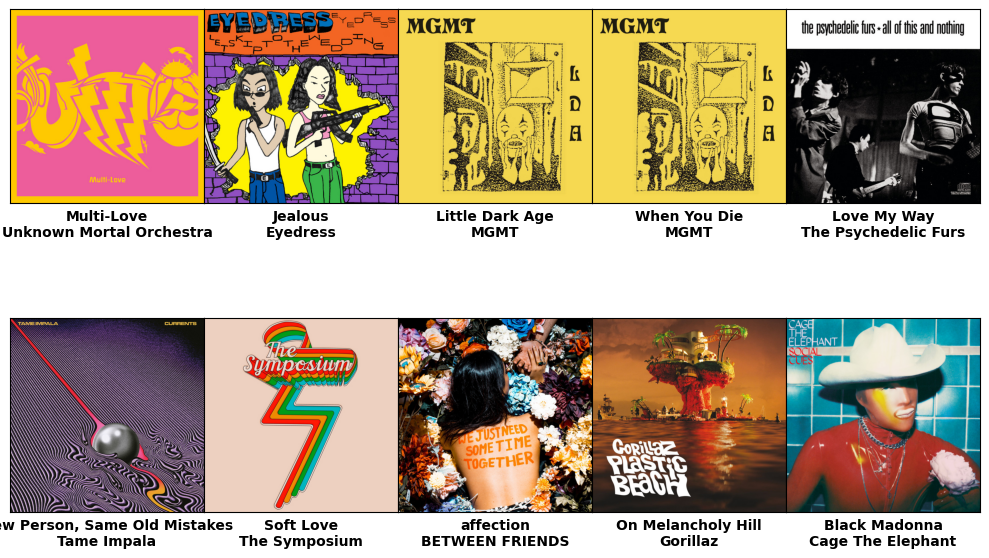

In [24]:
visualize_cover(playlist_df)/